

## Exercise 3: Information Gain (Mutual Information)

**Problem Description:**  
Capture any dependency (linear or non-linear) between feature and target with mutual information.

**Solution Overview:**  
Compute MI via `mutual_info_classif`, rank, and plot.



In [9]:
# 3.1 Setup
from sklearn.feature_selection import mutual_info_classif
import pandas as pd
from sklearn.datasets import load_iris
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

In [11]:
# 3.2 Compute and display MI scores
mi_scores = mutual_info_classif(X, y, random_state=42)
df_mi = pd.DataFrame({
'feature': X.columns,
'MI_score': mi_scores
}).sort_values('MI_score', ascending=False)
print("Mutual Information scores:\n", df_mi)

Mutual Information scores:
              feature  MI_score
2  petal length (cm)  0.992573
3   petal width (cm)  0.985643
0  sepal length (cm)  0.511365
1   sepal width (cm)  0.299424


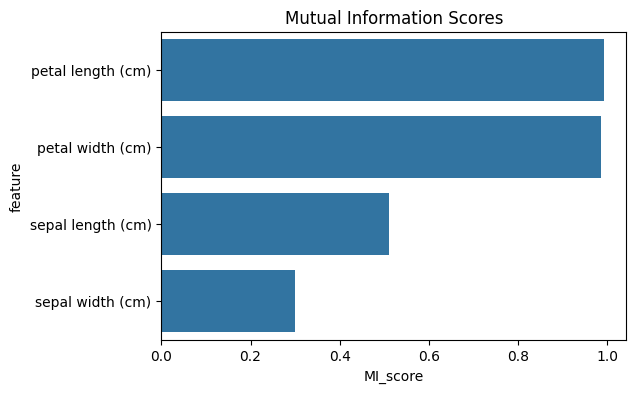

In [12]:
# 3.3 Plot
plt.figure(figsize=(6,4))
sns.barplot(x='MI_score', y='feature', data=df_mi)
plt.title('Mutual Information Scores')
plt.show()

# 3.3 Analysis
Explain how mutual information differs from correlation.

Which features carry the most information about the target?

Plot MI scores in a bar chart.



In [ ]:
# Exercise 3: Mutual Information
## Analysis to Include in Code

In [16]:
from sklearn.feature_selection import SelectKBest, f_classif

In [17]:
# 1. Compute ANOVA F-scores
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X, y)
anova_df = pd.DataFrame({
    'feature': X.columns,
    'F_score': selector.scores_
}).sort_values('F_score', ascending=False)

In [18]:
# 1. Compare to F-scores
merged = anova_df.merge(df_mi, on='feature')
print(merged.sort_values(['F_score','MI_score'], ascending=False))


             feature      F_score  MI_score
0  petal length (cm)  1180.161182  0.992573
1   petal width (cm)   960.007147  0.985643
2  sepal length (cm)   119.264502  0.511365
3   sepal width (cm)    49.160040  0.299424


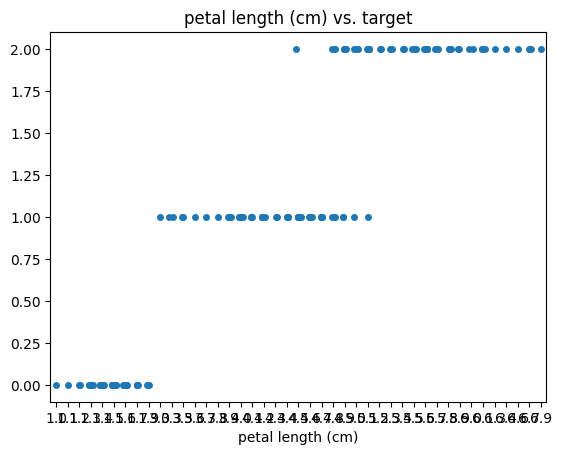

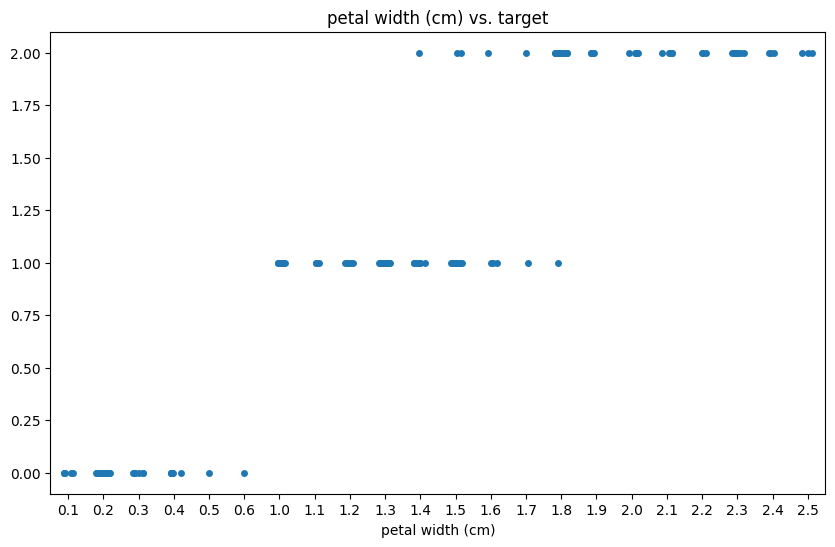

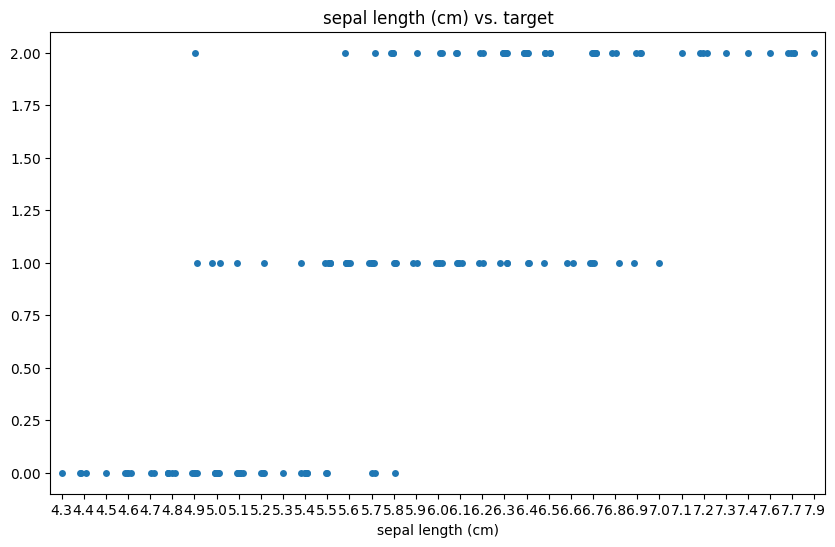

<Figure size 1000x600 with 0 Axes>

In [25]:
# 2. Non-linear Effects

for feat in df_mi['feature'][:3]:
    sns.stripplot(x=X[feat], y=y, jitter=0.2)
    plt.title(f"{feat} vs. target"); plt.show()
    plt.figure(figsize=(10,6))


In [30]:
# 3. Score Correlation

merged[['F_score','MI_score']].corr().iloc[0,1]

np.float64(0.9691248512491292)